<a href="https://colab.research.google.com/github/EG-Kim/pytorch_example_01/blob/master/5_Feedforward_Neural_Network_with_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feedforward Neural Network

#### Fashion MNIST

티셔츠, 운동화 등 작은 의복 이미지로 이루어진 데이터셋

28*28 pixel의 이미지 70000장


![대체 텍스트](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-Fashion-MNIST-Dataset-1024x768.png)

#### 모듈 불러오기

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#### Device configuration

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


#### Hyper-parameters 

In [3]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### Fashion MNIST dataset 

In [4]:
# Fashion MNIST dataset. torchvision에서 제공해주는 dataset download
train_dataset = torchvision.datasets.FashionMNIST(root='../../data', 
                                                  train=True, 
                                                  transform=transforms.ToTensor(),  
                                                  download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='../../data', 
                                                 train=False, 
                                                 transform=transforms.ToTensor())

# Data loader. dataloader class를 이용하여 데이터셋을 학습하기 쉽도록 만듦.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### Fully connected neural network with one hidden layer

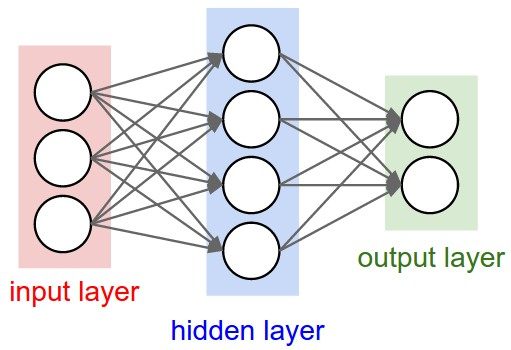

In [5]:
# hidden layer = 1인 모델 만들기
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): # 생성자 정의.
        super(NeuralNet, self).__init__() # super() 함수: 부르면 여기서 만든 NeuralNet class는 nn.Module class의 속성들을 가지고 초기화됨
        self.fc1 = nn.Linear(input_size, hidden_size)  # fully connected layer
        self.relu = nn.ReLU() # activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x): # 전방계산
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#### Loss and optimizer


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

#### Train the model

In [7]:
total_step = len(train_loader) # total train dataset 60000 / batch size 100 = 600
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2505
Epoch [1/5], Step [200/600], Loss: 2.1721
Epoch [1/5], Step [300/600], Loss: 2.1389
Epoch [1/5], Step [400/600], Loss: 2.0838
Epoch [1/5], Step [500/600], Loss: 2.0642
Epoch [1/5], Step [600/600], Loss: 2.0033
Epoch [2/5], Step [100/600], Loss: 1.9510
Epoch [2/5], Step [200/600], Loss: 1.9467
Epoch [2/5], Step [300/600], Loss: 1.8236
Epoch [2/5], Step [400/600], Loss: 1.7864
Epoch [2/5], Step [500/600], Loss: 1.7112
Epoch [2/5], Step [600/600], Loss: 1.6721
Epoch [3/5], Step [100/600], Loss: 1.6388
Epoch [3/5], Step [200/600], Loss: 1.6309
Epoch [3/5], Step [300/600], Loss: 1.5819
Epoch [3/5], Step [400/600], Loss: 1.5165
Epoch [3/5], Step [500/600], Loss: 1.4673
Epoch [3/5], Step [600/600], Loss: 1.3778
Epoch [4/5], Step [100/600], Loss: 1.3965
Epoch [4/5], Step [200/600], Loss: 1.2997
Epoch [4/5], Step [300/600], Loss: 1.3077
Epoch [4/5], Step [400/600], Loss: 1.2168
Epoch [4/5], Step [500/600], Loss: 1.2480
Epoch [4/5], Step [600/600], Loss:

#### Test the model

In [8]:
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 66.44 %


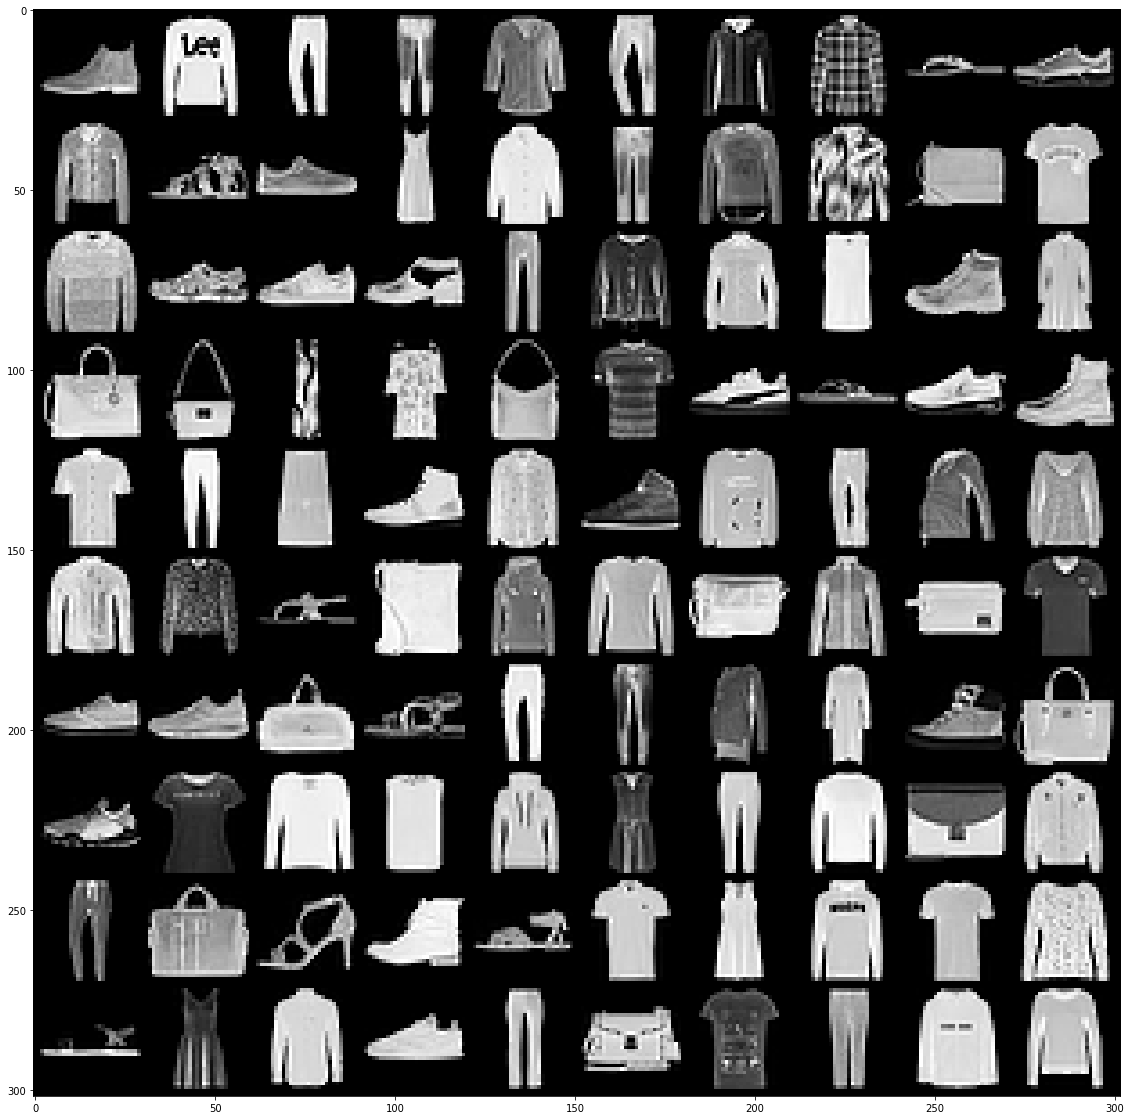

ground truth:  tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2])
predicted:  tensor([9, 2, 1, 1, 6, 1, 4, 4, 7, 7, 2, 9, 7, 3, 4, 1, 2, 2, 8, 0, 0, 7, 7, 7,
        1, 2, 4, 3, 9, 3, 8, 8, 3, 3, 8, 0, 7, 7, 7, 9, 0, 1, 3, 9, 4, 9, 2, 1,
        4, 2, 2, 2, 7, 2, 4, 2, 8, 4, 8, 0, 7, 7, 8, 7, 1, 1, 3, 3, 7, 8, 7, 0,
        2, 0, 4, 3, 1, 2, 8, 2, 1, 8, 9, 9, 7, 0, 3, 4, 0, 2, 5, 3, 4, 7, 1, 8,
        0, 1, 2, 2], device='cuda:0')


In [10]:
# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(20, 20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


with torch.no_grad():
    # get some random training images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images, nrow=10))
    
    images = images.reshape(-1, 28*28).to(device)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    

    
    # print labels
    print("ground truth: ", labels)
    print("predicted: ", predicted)

## 실습


https://paperswithcode.com/sota/image-classification-on-fashion-mnist

hyper parameter를 조절하여 85% 이상의 정확도를 달성하세요.

In [11]:
# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/10], Step [100/600], Loss: 2.2415
Epoch [1/10], Step [200/600], Loss: 2.1769
Epoch [1/10], Step [300/600], Loss: 2.1272
Epoch [1/10], Step [400/600], Loss: 2.0793
Epoch [1/10], Step [500/600], Loss: 2.0508
Epoch [1/10], Step [600/600], Loss: 1.9503
Epoch [2/10], Step [100/600], Loss: 1.9044
Epoch [2/10], Step [200/600], Loss: 1.8982
Epoch [2/10], Step [300/600], Loss: 1.8042
Epoch [2/10], Step [400/600], Loss: 1.7419
Epoch [2/10], Step [500/600], Loss: 1.6977
Epoch [2/10], Step [600/600], Loss: 1.6357
Epoch [3/10], Step [100/600], Loss: 1.5558
Epoch [3/10], Step [200/600], Loss: 1.6154
Epoch [3/10], Step [300/600], Loss: 1.4463
Epoch [3/10], Step [400/600], Loss: 1.5387
Epoch [3/10], Step [500/600], Loss: 1.4594
Epoch [3/10], Step [600/600], Loss: 1.4095
Epoch [4/10], Step [100/600], Loss: 1.3685
Epoch [4/10], Step [200/600], Loss: 1.4300
Epoch [4/10], Step [300/600], Loss: 1.3033
Epoch [4/10], Step [400/600], Loss: 1.2403
Epoch [4/10], Step [500/600], Loss: 1.2379
Epoch [4/10

다음 주차 CNN 코드 맛보기

In [12]:
# Hyper-parameters 
input_size = (28, 28)
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.0006


class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(7*7*64, num_classes)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.pool(out)

        out = self.conv2(out)
        out = self.relu(out)
        out = self.pool(out)

        out = out.reshape(-1, 7*7*64)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        #images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/10], Step [100/600], Loss: 0.5714
Epoch [1/10], Step [200/600], Loss: 0.6096
Epoch [1/10], Step [300/600], Loss: 0.3698
Epoch [1/10], Step [400/600], Loss: 0.4176
Epoch [1/10], Step [500/600], Loss: 0.3173
Epoch [1/10], Step [600/600], Loss: 0.3772
Epoch [2/10], Step [100/600], Loss: 0.3927
Epoch [2/10], Step [200/600], Loss: 0.2155
Epoch [2/10], Step [300/600], Loss: 0.3765
Epoch [2/10], Step [400/600], Loss: 0.2907
Epoch [2/10], Step [500/600], Loss: 0.2710
Epoch [2/10], Step [600/600], Loss: 0.4533
Epoch [3/10], Step [100/600], Loss: 0.2924
Epoch [3/10], Step [200/600], Loss: 0.2861
Epoch [3/10], Step [300/600], Loss: 0.1761
Epoch [3/10], Step [400/600], Loss: 0.3202
Epoch [3/10], Step [500/600], Loss: 0.1776
Epoch [3/10], Step [600/600], Loss: 0.2880
Epoch [4/10], Step [100/600], Loss: 0.3364
Epoch [4/10], Step [200/600], Loss: 0.2997
Epoch [4/10], Step [300/600], Loss: 0.3179
Epoch [4/10], Step [400/600], Loss: 0.1604
Epoch [4/10], Step [500/600], Loss: 0.2033
Epoch [4/10